In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
!pip install kagglehub

In [89]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("tunguz/online-retail")

print("Path to dataset files:", path)
df = pd.read_csv(path + '/' + os.listdir(path)[0], encoding='latin1')
df.shape

Path to dataset files: /Users/chabyeong-gon/.cache/kagglehub/datasets/tunguz/online-retail/versions/1


(541909, 8)

In [90]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [92]:
# 주문 가격 피쳐 생성
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

In [93]:
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

# 'InvoiceDate' 컬럼 이용하여 판매 월 추출
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"].astype(str))
df["InvoiceMonth"] = df["InvoiceDate"].dt.month

/var/folders/j8/zxc2cbt94j94y741fxn1qyrm0000gn/T/ipykernel_31343/3844768752.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


## 1. 모집단과 표본 집단의 TotalPrice를 비교해 주세요.

* 데이터셋에서 무작위로 1000개의 표본을 추출하세요.
* 추출된 표본과 전체 데이터셋의 'TotalPrice'에 대해 평균과 표준편차를 비교해주세요.  
* 중심극한정리를 사용해 모집단과 표본의 차이를 설명해주세요.

In [94]:
# 1. 무작위 1000개 표본 추출
sample = df.sample(n=1000, random_state=42)

# 표본평균, 표본표준편차 계산
sample_mean = sample['TotalPrice'].mean()
sample_std = sample['TotalPrice'].std()

# 전체 데이터셋(모집단) 'TotalPrice'의 평균, 표준편차 계산
total_mean = df['TotalPrice'].mean()
total_std = df['TotalPrice'].std()

sample.shape

(1000, 11)

In [95]:
# 2. 추출된 표본(sample)과 전체 데이터셋(df)의 평균, 표춘편차를 비교
summary_df = pd.DataFrame({
    "구분": ["모집단 (df)", "표본 (n=1000)"],
    "평균 (Mean)": [total_mean, sample_mean],
    "표준편차 (Std)": [total_std, sample_std]
}).set_index('구분')

summary_df

,평균 (Mean),표준편차 (Std)
구분,,
모집단 (df),17.987795,378.810824
표본 (n=1000),16.832070,64.467328


/Users/chabyeong-gon/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


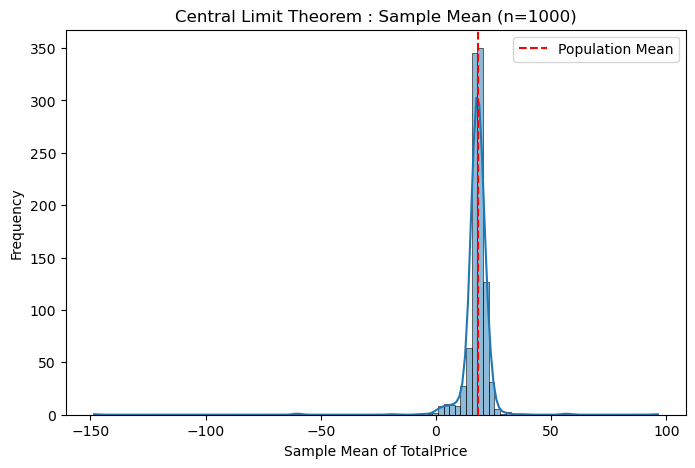

In [96]:
# 3.중심극한정리를 사용해 모집단과 표본의 차이를 설명
# 표본 평균들을 저장할 리스트
sample_means = []

# 중심극한정리 실험
for _ in range(1000):
    sample = df['TotalPrice'].sample(n=1000, replace=False)
    sample_means.append(sample.mean())

sample_means = np.array(sample_means)

# 표본 평균 분포 시각화
plt.figure(figsize=(8, 5))
sns.histplot(sample_means, bins=100, kde=True)
plt.axvline(total_mean, color='red', linestyle='--', label='Population Mean')
plt.title("Central Limit Theorem : Sample Mean (n=1000)")
plt.xlabel("Sample Mean of TotalPrice")
plt.ylabel("Frequency")
plt.legend()
plt.show()

## 2. 주문이 가장 많은 상위 두 국가의 'TotalPrice' 평균에 차이가 있는지 검증하세요.

* 'Country' 변수를 바탕으로 주문이 가장 많은 상위 두 국가를 찾으세요.
* 독립표본 t-검정을 사용하여 두 국가 간 'TotalPrice' 평균의 차이가 통계적으로 유의미한지 검증하세요.  
* t-통계량과 p-값을 해석하여 결과를 설명하고, 1종 오류와 2종 오류의 개념을 적용하여 설명해주세요.

In [97]:
# 1. 국가별 주문 수 계산
top_countries = (df.groupby("Country").size().sort_values(ascending=False).head(2))
top_countries

Country
United Kingdom    495478
Germany             9495
dtype: int64

In [98]:
# 2. 독립표본 t-검정을 사용하여 두 국가 간 'TotalPrice' 평균의 차이가 통계적으로 유의미한지 검증

# 귀무 가설 : 두 국가의 평균 TotalPrice는 같다
# 대립 가설 : 두 국가의 평균 TotalPrice는 다르다

# 상위 두 국가 이름 추출
country_a, country_b = top_countries.index

# 각 국가의 TotalPrice 데이터
group_a = df[df["Country"] == country_a]["TotalPrice"]
group_b = df[df["Country"] == country_b]["TotalPrice"]

# 독립표본 t-검정 수행
from scipy import stats

# 두 국가의 거래 금액 분산이 같다고 가정하기 어렵기 때문에 Welch's t-test 사용
t_stat, p_value = stats.ttest_ind(
    group_a,
    group_b,
    equal_var=False 
)

t_stat, p_value

(-10.046360185819829, 9.823416115791871e-24)

In [99]:
# t_stat < 0 이므로 country_a의 평균 < country_b의 평균
# 즉 Germany의 평균 TotalPrice가 더 크다

# p_value < 0.05므로 귀무가설 기각
# TotalPrice의 평균 차이는 통계적으로 유의미하다고 볼 수 있다

# 1종 오류는 실제로는 평균이 같은데, 다르다고 결론을 내리는 경우다. 이 경우에는 p_value값이 매우 작기 때문에 가능성이 낮다
# 2종 오류는 실제로는 평균이 다른데, 차이가 없다고 결론 내리는 경우다. 이 경우에는 귀무가설을 기각했므로 해당사항이 없다.

## 3. 주중, 주말에 따라서 발생하는 UnitPrice의 분포가 달라지는지 확인하세요.

* 주중의 'UnitPrice'와 주말의 'UnitPrice'의 분포를 분석하기 위해 데이터의 중심경향치(평균, 중간값), 변산성(표준편차, 분산), 분위수를 계산하세요.  
* 상자수염그림과 히스토그램을 그려 시각화를 통해 분포를 확인하고 데이터의 분포에 대해 설명해주세요.

In [100]:
# 주중(월~금: 0~4), 주말(토~일: 5~6) 데이터 분리
weekday = df[df['DayOfWeek'] < 5]['UnitPrice']
weekend = df[df['DayOfWeek'] >= 5]['UnitPrice']

# 1. 기술통계량 계산
summary_statistics = pd.DataFrame({
    "구분": ["주중", "주말"],
    "평균": [weekday.mean(), weekend.mean()],
    "중앙값": [weekday.median(), weekend.median()],
    "표준편차": [weekday.std(), weekend.std()],
    "분산": [weekday.var(), weekend.var()],
    "Q1": [weekday.quantile(0.25), weekend.quantile(0.25)],
    "Q3": [weekday.quantile(0.75), weekend.quantile(0.75)]
}).set_index("구분")

summary_statistics

,평균,중앙값,표준편차,분산,Q1,Q3
구분,,,,,,
주중,4.843425,2.10,103.032058,10615.604927,1.25,4.13
주말,2.887824,1.85,7.959497,63.353599,1.25,3.75


/Users/chabyeong-gon/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/chabyeong-gon/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/chabyeong-gon/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47568 (\N{HANGUL SYLLABLE MAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


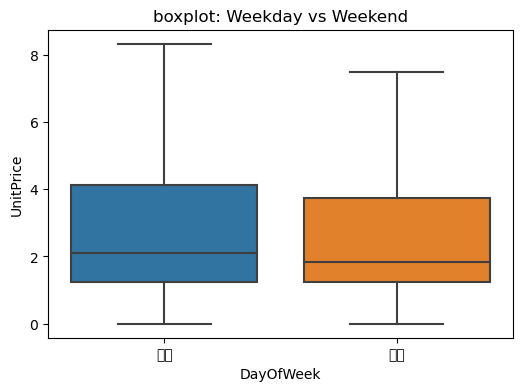

In [101]:
plt.figure(figsize=(6, 4))
sns.boxplot(
    x=df['DayOfWeek'].apply(lambda x: '주중' if x < 5 else '주말'),
    y=df['UnitPrice'],
    showfliers=False
)
plt.title("boxplot: Weekday vs Weekend")
plt.show()

/Users/chabyeong-gon/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/chabyeong-gon/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


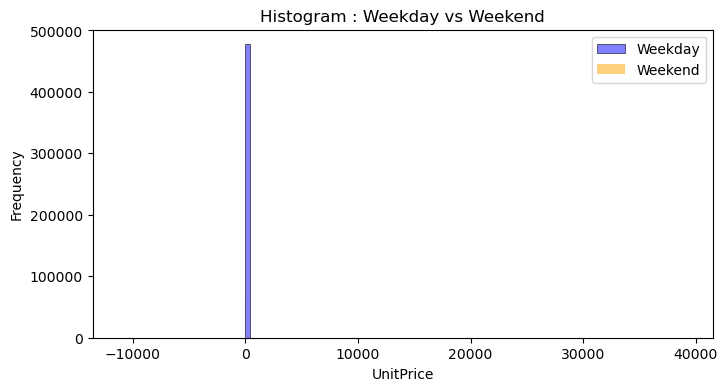

In [102]:
# 히스토그램
plt.figure(figsize=(8, 4))

sns.histplot(weekday, bins=100, color='blue', label='Weekday', alpha=0.5)
sns.histplot(weekend, bins=100, color='orange', label='Weekend', alpha=0.5)

plt.title("Histogram : Weekday vs Weekend")
plt.xlabel("UnitPrice")
plt.ylabel("Frequency")
plt.legend()
plt.show()

## 4. 상품의 단가와 판매 국가, 판매 날짜을 이용해 판매 수량을 예측하는 회귀 모델을 만드세요.
* 필요한 데이터를 정리하고 결측치와 이상치를 제거해주세요.  
* 변수를 다음과 같이 설정하여 다중 선형 회귀 분석을 진행하세요.
    * 종속변수: 판매 수량(`Quantity`)
    * 독립변수: 상품 단가(`UnitPrice`), 판매 국가(`Country`), 판매 요일(`DayOfWeek`), 판매 월( `InvoiceMonth`)   
* 회귀계수와 결정계수를 활용하여 회귀 분석 결과를 해석해주세요.

In [103]:
# 1. 필요한 데이터 정리
cols = ['Quantity', 'UnitPrice', 'Country', 'DayOfWeek', 'InvoiceMonth']
data = df[cols].copy()

# 2. 결측치 제거
data = data.dropna()

# 3. 이상치 제거 (UnitPrice <= 0 제거, UnitPrice <= 0 제거)
data = data[data['UnitPrice'] > 0]
data = data[data['Quantity'] > 0]

In [104]:
# 범주형 변수 인코딩
data_encoded = pd.get_dummies(data, columns = ['Country'], drop_first = True)

In [105]:
# 독립변수(X), 종속변수(y) 분리
X = data_encoded.drop('Quantity', axis=1)
y = data_encoded['Quantity']

# 학습용 / 테스트용 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 2. 다중 선형 회귀 모델 학습
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# 회귀계수 확인
coef_df = pd.DataFrame({
    '변수': X.columns,
    '회귀계수': model.coef_
}).sort_values(by='회귀계수', ascending=False)

coef_df

,변수,회귀계수
26,Country_Netherlands,14.352894
22,Country_Japan,11.538318
34,Country_Sweden,9.239044
0,UnitPrice,-0.014375
2,InvoiceMonth,-0.044597
1,DayOfWeek,-0.178656
10,Country_Czech Republic,-44.852487
32,Country_Singapore,-46.290157
11,Country_Denmark,-49.013274
24,Country_Lithuania,-51.006647


In [106]:
# 결정계수(R^2) 계산
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

r2

0.027712992412047832

In [107]:
# 3. 회귀계수와 결정계수를 활용하여 회귀 분석 결과를 해석

print(f"결정계수 (R²): {r2:.3f}")
print("회귀계수 상위 변수:")
coef_df.head()

결정계수 (R²): 0.028
회귀계수 상위 변수:


,변수,회귀계수
26,Country_Netherlands,14.352894
22,Country_Japan,11.538318
34,Country_Sweden,9.239044
0,UnitPrice,-0.014375
2,InvoiceMonth,-0.044597


In [108]:
# [회귀계수]
# 회귀계수는 다른 조건이 같을 때, 해당 변수가 1 단위 증가하면 판매 수량(Quantity)이 평균적으로 얼마나 변하는지를 의미함
# UnitPrice 계수가 음수라면 가격이 오를수록 판매 수량이 감소하는 경향을 의미
# Country는 인코딩된 변수로 기준 국가 대비 판매 수량 차이를 나타냄

# [결정계수]
# R^2는 판매 수량 변동 중 모델이 설명할 수 있는 비율
# 값이 높을수록 설명력은 크지만, 해석 시 변수 의미와 함께 판단해야 함

## 5. 상품 정보와 거래 정보를 바탕으로 해당 거래가 반품될 가능성을 예측하는 로지스틱 회귀 모델을 만드세요.
* 필요한 데이터를 정리하고 결측치와 이상치를 제거해주세요.  
* `Quantity` 피쳐를 활용해 `IsReturn` 피쳐를 생성하세요.
* 모델 학습에 사용할 적절한 피쳐를 선정하세요.
* 모델 학습과 검증을 위해 데이터셋을 train셋과 test셋으로 나누세요.
* `IsReturn`을 예측하는 로지스틱 회귀 모델을 학습하세요.
* 혼동행렬, 정밀도, 재현율, F1-score 등 다양한 평가지표를 사용하여 모델의 성능을 평가하세요.
* 모델의 성능을 더 높일 수 있는 방안에 대해서 고민해보세요.

In [109]:
# 1. 필요한 컬럼 선택
cols = ['Quantity', 'UnitPrice', 'Country', 'DayOfWeek', 'InvoiceMonth']
data = df[cols].copy()


# 2. 결측치 제거 / 이상치 제거
data = data.dropna()
data = data[data['UnitPrice'] > 0]
data = data[data['Quantity'] != 0]


# 3. IsReturn 피쳐 생성
data['IsReturn'] = (data['Quantity'] < 0).astype(int)

In [110]:
# 4. 모델 학습에 적절한 피쳐 선정
# Quantity는 타깃 생성에 사용했으므로 제외
features = ['UnitPrice', 'Country', 'DayOfWeek', 'InvoiceMonth']
# 모델이 맞춰야 하는 정답이기 때문에 분리
data_model = data[features + ['IsReturn']]


# 범주형 변수 인코딩 (Country)
data_model = pd.get_dummies(data_model, columns=['Country'], drop_first=True)


# 독립변수(X), 종속변수(y) 분리
X = data_model.drop('IsReturn', axis=1)
y = data_model['IsReturn']

In [111]:
# 5. Train / Test 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [112]:
# 6. 로지스틱 회귀 모델 학습
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)

In [113]:
# 7. 혼동행렬 및 성능 평가 지표
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score

conf_mat = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

conf_mat, precision, recall, f1

(array([[106005,     16],
        [  1847,     11]]),
 0.4074074074074074,
 0.005920344456404736,
 0.011671087533156498)

In [114]:
# 8. 모델 성능 개선 아이디어
# - 로그 변환된 UnitPrice 사용
# - 고객 ID, 상품 ID 등 추가 피쳐 활용